In [51]:
'''We are importing all the necessary 
python libraries for Data analytics 
'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("Walmart Sales Data.csv") # Reading the csv file into Data Frame using pandas 
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [52]:
# Product Analysis
# 1]How many distinct product lines are there in the dataset?

print(df['Product line'].drop_duplicates()) # Drop duplicates from  productline to get unique 
product_line = df['Product line'].nunique() # nunique() give distinct product line number
print(product_line)


0          Health and beauty
1     Electronic accessories
2         Home and lifestyle
4          Sports and travel
9         Food and beverages
10       Fashion accessories
Name: Product line, dtype: object
6


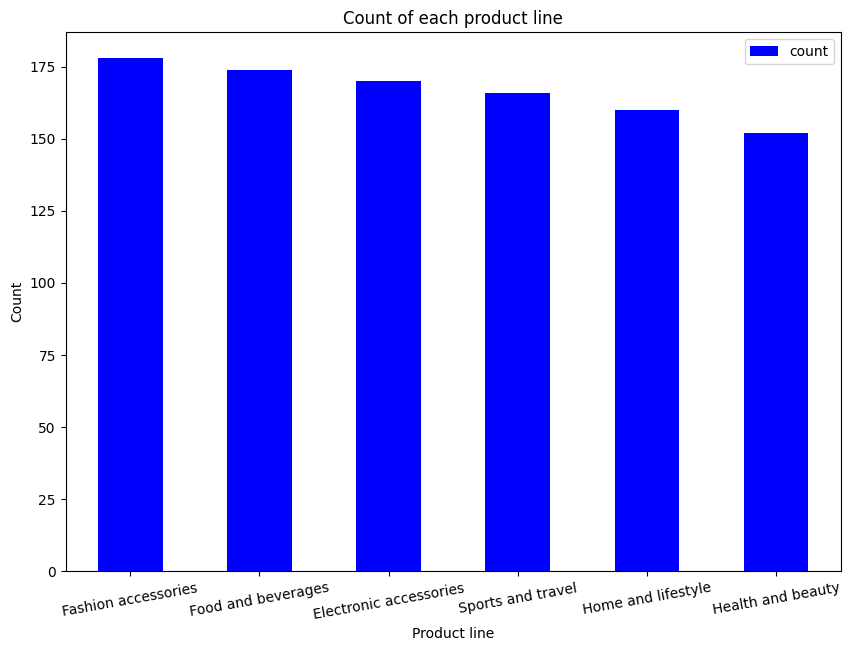

In [53]:
# Visualizing the first question: 1]How many distinct product lines are there in the dataset?

# Count the occurences of each Product line
product_line_count = df['Product line'].value_counts() # value_counts() counts occurences of each unique product line
       
 # set the figure size for the plot (width=10,height=7)                                                     
plt.figure(figsize=(10,7)) 

# Plot a bar graph to display the count of each product line
product_line_count.plot(kind='bar',color='blue',legend=True) # kind='bar' creates a bar plot and 'color' sets the bar color

# Add a title and labels to the plot
plt.title("Count of each product line") # Title for the plot
plt.xlabel("Product line") # Label for x-axis
plt.ylabel("Count") # Label for y-axis
plt.xticks(rotation=10) # Rotate the x-axis labels slightly for better readability

# Display the plot
plt.show() # Render the bar plot

In [54]:
# 2] What is the most common payment method?

# Count the  occurences of each payment method
payment_method = df['Payment'].value_counts() # value_counts() count the occurences of each payment method

# idxmax() returns the payment method with highest occurences
most_common_payment = payment_method.idxmax()

# Use f-string to print the most common payment method
print(f"The most common payment method is {most_common_payment}")

The most common payment method is Ewallet


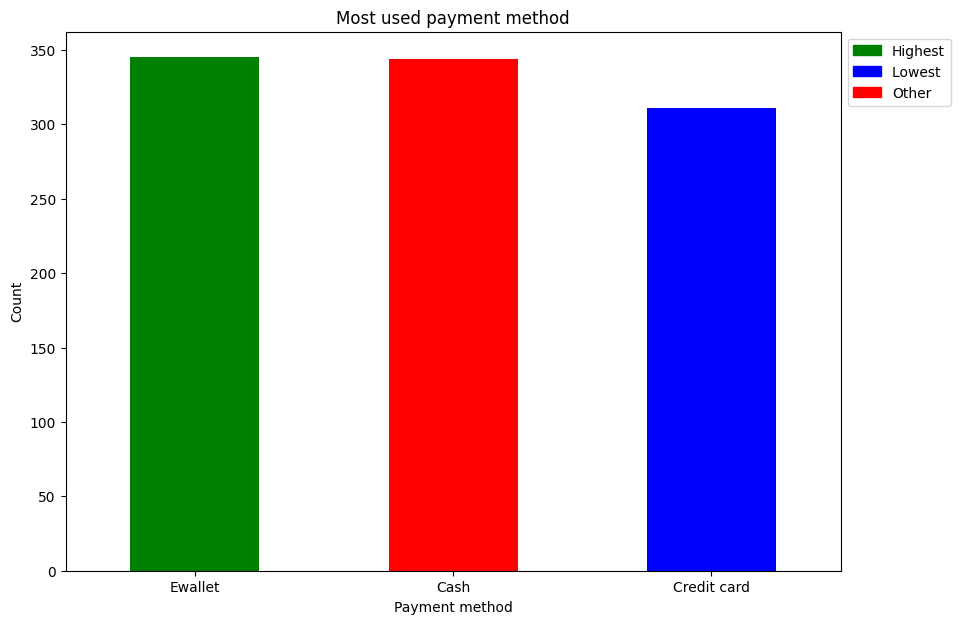

In [55]:
# Visualizing the second question: 2] What is the most common payment method?

# Count the occurrences of each Payment method
payment_count = df['Payment'].value_counts()

# Set the figure size for the plot (width=10, height=7)
plt.figure(figsize=(10,7))

# Find the maximum and minimum most common payment counts
max_value = payment_count.max()
min_value = payment_count.min()

# Define colors based on conditions: red for regular, green for highest, blue for lowest
colors = ['green' if x == max_value else 'blue' if x == min_value else 'red' for x in payment_count]

# Plot a bar graph with custom colors for each payment method
payment_count.plot(kind='bar',color=colors,legend=True)

# Add a title and labels to the plot
plt.title('Most used payment method')
plt.xlabel('Payment method')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Create custom patches for the legend 
import matplotlib.patches as mpatches
highest_patch = mpatches.Patch(color='green', label='Highest')
lowest_patch = mpatches.Patch(color='blue', label='Lowest ')
rest_patch = mpatches.Patch(color='red', label='Other')

# Add the legend outside the bar graph to avoid overlap
plt.legend(handles=[highest_patch, lowest_patch, rest_patch], loc='upper left', bbox_to_anchor=(1, 1))


# Display the plot
plt.show()



In [56]:
# 3]What is the most selling product line?

# Group the data by 'Product line' and calculate the sum of 'Total' sales for each product line
product_sales = df.groupby('Product line')['Total'].sum()

# idxmax() returns the product line with highest total sales
most_selling_product_line = product_sales.idxmax() 

# Use an f-string to print the most selling product line
print(f"The most selling product line : {most_selling_product_line}")


The most selling product line : Food and beverages


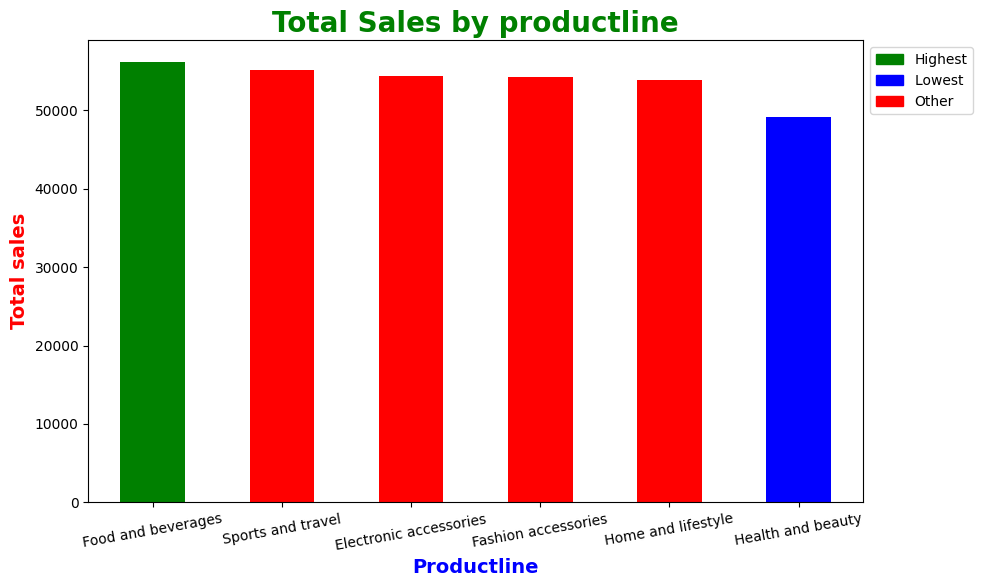

In [57]:
# Visualizing the question:3] What is the most selling product line?

# Group the data by 'Product line' and calculate the sum of 'Total' sales for each product line
product_sales = df.groupby('Product line')['Total'].sum()

# Sort the product_sales in descending order (ascending=False)
product_sales = product_sales.sort_values(ascending=False)

# Set the figure size for the plot (Width=10, height=6)
plt.figure(figsize=(10,6))

# Find the maximum and minimum selling product line
max_value = product_sales.max()
min_value = product_sales.min()

# Define colors based on conditions: red for regular, green for highest, blue for lowest
colors = ['green' if x==max_value else 'blue' if x==min_value else 'red' for x in product_sales]


# Plot a bar graph to display the total product sales for each product line
product_sales.plot(kind='bar',color=colors,legend=True) # kind='bar' creates a bar plot and color sets the bar color

# Add a title with custom font size and weight , color set to green
plt.title('Total Sales by productline',color='green',fontdict={'fontsize':20,'fontweight':'bold'})

# Label the x-axis as 'Productline' with custom font size,weight and color set to blue
plt.xlabel('Productline',color='blue',fontdict={'fontsize':14,'fontweight':'bold'})

# Label the y-axis as 'Total sales' with custom font size,weight and color set to red
plt.ylabel('Total sales',color='red',fontdict={'fontsize':14,'fontweight':'bold'})

# Rotate the x-axis labels by 10 degrees for better readability
plt.xticks(rotation=10)

# Create custom patches for the legend 
import matplotlib.patches as mpatches
highest_patch = mpatches.Patch(color='green', label='Highest')
lowest_patch = mpatches.Patch(color='blue', label='Lowest ')
rest_patch = mpatches.Patch(color='red', label='Other')

# Add the legend outside the bar graph to avoid overlap
plt.legend(handles=[highest_patch, lowest_patch, rest_patch], loc='upper left', bbox_to_anchor=(1, 1))


# Display the plot
plt.show()




In [58]:
# 4] What is the total revenue by month?

# Convert the 'Date' column to datetime format
# This ensures that the 'Date' column recognized as actual date values rather than strings
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column and store it in a new 'Month' column
# The strftime('%B') function  formats the date to return the full month name(eg:'January','February'etc)
df['Month'] = df['Date'].dt.strftime('%B')

# Group the data by the 'Month' column and and calculate the sum of the 'Total' sales for each month
# This groups the sales data by month and sums up the 'Total' sales for all entries in each month
total_revenue = df.groupby('Month')['Total'].sum()

# Print the total revenue(sales) for each month
print(total_revenue)

Month
February     97219.374
January     116291.868
March       109455.507
Name: Total, dtype: float64


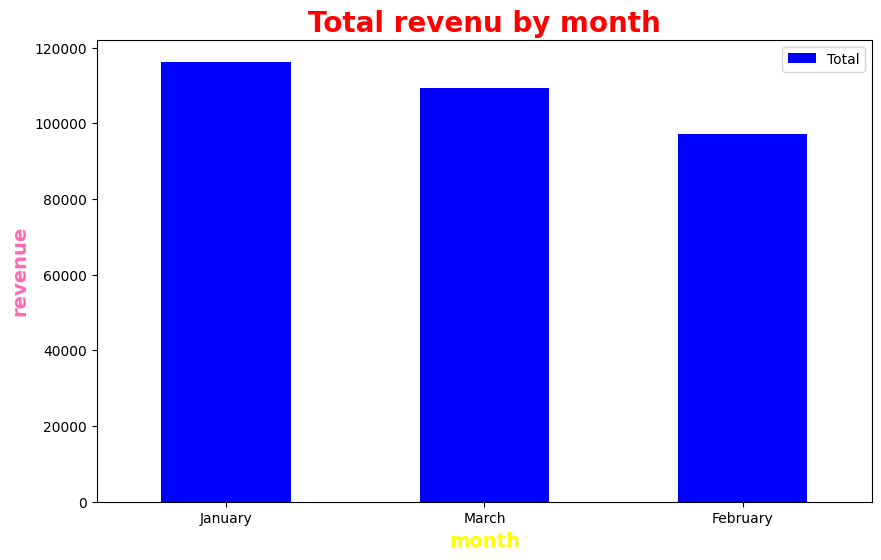

In [59]:
# Visualizing the question:4] What is the total revenue by month?

# Group the data by the 'Month' column and and calculate the sum of the 'Total' sales for each month
total_revenue = df.groupby('Month')['Total'].sum()

# Sort the total revenue by month in descending order (ascending=False)
total_revenue = total_revenue.sort_values(ascending=False)

#  Set the figure size to 10 inches wide by 6 inches high
plt.figure(figsize=(10,6))

# Plot total revenue by month as a bar chart with blue bars
total_revenue.plot(kind='bar',color='blue',legend=True)

# Add a title and label axes with custom font sizes, colors and bold text
plt.title('Total revenu by month',color='red',fontdict={'fontsize':20,'fontweight':'bold'})
plt.xlabel('month',color='yellow',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('revenue',color='hotpink',fontdict={'fontsize':14,'fontweight':'bold'})

# Ensures the x-axis labels(month) are not rotated, for clear readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [60]:
# 5] Which month recorded the highest Cost of Goods Sold (COGS)?

# Convert the 'Date' column to datetime format
# This allows for date manipulation and extraction of month information.
df['Date']= pd.to_datetime(df['Date'])

# Create a new 'Month' column with the full month name from the 'Date' column
# This makes it easier to analyze data on a monthly basis.
df['Month'] = df['Date'].dt.strftime('%B')

# Group by 'Month' and sums 'cogs' (Cost of goods sold) for each month
# This provides a total cost of goods sold for every month in the dataset.
total_record_month = df.groupby('Month')['cogs'].sum()

# Identify the month with highest total 'cogs'
# This gives us the month where the cost of goods sold was the highest.
total_highest_cogs_month = total_record_month.idxmax()

# Print the month with the highest recorded 'cogs' and its value
print(f"The highest recorded cogs month is {total_highest_cogs_month} and the maximum of cogs is {total_record_month.max()}")

The highest recorded cogs month is January and the maximum of cogs is 110754.16


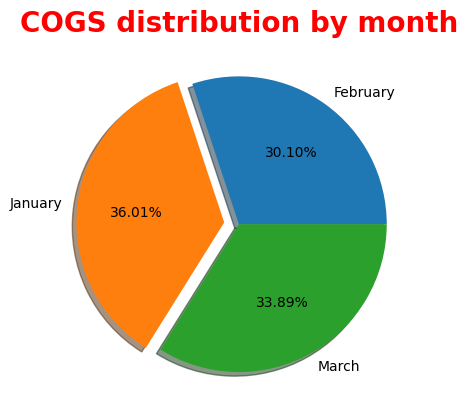

In [61]:
# Visualizing the question:5] Which month recorded the highest Cost of Goods Sold (COGS)?

# create an 'explode' list to highlight the month with the highest cogs
# This offers the corresponding slice of the pie chart: 0.1(10% of the radius) for the highest Cogs month, 0 for others
explode = [0.1 if month == total_highest_cogs_month else 0 for month in total_record_month.index]

# Plot a pie chart for the total cogs distribution by month
# kind ='Pie' indicates a pie chart
# explode highlights the highest cogs month
# autopct = '%1.2f%%' shows percentages to two decimal places
# shadow = True add a subtle  shadow for depth
total_record_month.plot(kind='pie',explode=explode,autopct='%1.2f%%',shadow=True)

#Add a title  with custom font sizes, colors and bold text
plt.title("COGS distribution by month",color='red',fontdict={'fontsize':20,'fontweight':'bold'})

# Remove the y-axis label as it's not needed in pie charts
plt.ylabel('') 
plt.show() # Display the plot



In [62]:
#  6] Which product line generated the highest revenue?

# Grouping  by 'Product line' and summing the 'Total' column to find highest revenue
product_line_highest_rev = df.groupby('Product line')['Total'].sum()

# Finding the product line with highest revenue
highest_revenue = product_line_highest_rev.idxmax()

# Print the result using a formatted string, displaying the product line with the highest revenue and the corresponding revenue amount
print(f"{highest_revenue} is the product line that generated the highest revenue of {product_line_highest_rev.max()}.")

Food and beverages is the product line that generated the highest revenue of 56144.844.


In [63]:
# 7] Which city has the highest revenue?

# Grouping by 'City' and summing the 'Total' column to find highest revenue
highest_city_revenue = df.groupby('City')['Total'].sum()

# Identify the city with the highest revenue
highest_city_revenue_wise = highest_city_revenue.idxmax()

# Print the result showing the city with the highest revenue and the corresponding the revenue amount
print(f"{highest_city_revenue_wise} is the city which has highest revenue of {highest_city_revenue.max()}")



Naypyitaw is the city which has highest revenue of 110568.7065


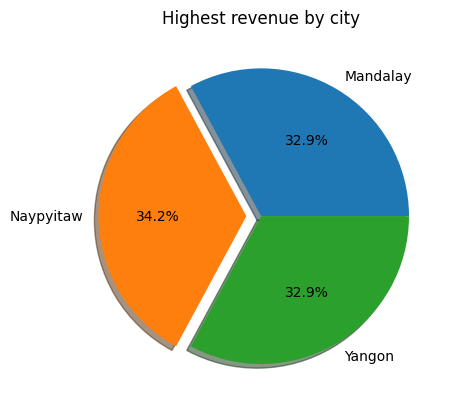

In [97]:
# Visualizing the question:7] Which city has the highest revenue?

# create an 'explode' list to highlight the city with the highest revenue
# This offers the corresponding slice of the pie chart: 0.1(10% of the radius) for the highest revenue city, 0 for others
explode = [0.1 if city==highest_city_revenue_wise else 0 for city in highest_city_revenue.index]

# # Plot a pie chart to visualize the revenue distribution among cities
# 'autopct='%1.1f%%'' displays the percentage of each slice with one decimal place
# 'shadow=True' adds a shadow effect to the slices for better visual depth
highest_city_revenue.plot(kind='pie',explode=explode,autopct='%1.1f%%',shadow=True)

# Set the title of the pie chart to indicate what it represents
plt.title('Highest revenue by city')

# Hide the y-label since it is not needed for a pie chart
plt.ylabel('') # Hide the label 
plt.show() # Display the plot


In [65]:
# 8]Which product line incurred the highest VAT?

# Group the DataFrame by 'Product line' and sum the 'Tax 5%' column to calculate total vat for each product line
productline_highest_vat = df.groupby('Product line')['Tax 5%'].sum()

# Identify the product line with the highest VAT incurred
productline_highest_vat_wise = productline_highest_vat.idxmax()

# Print the result showing the product line that incurred the highest VAT and the corresponding amount
print(f"{productline_highest_vat_wise} is the product line incurred the highest VAT - {productline_highest_vat.max()}")

Food and beverages is the product line incurred the highest VAT - 2673.564


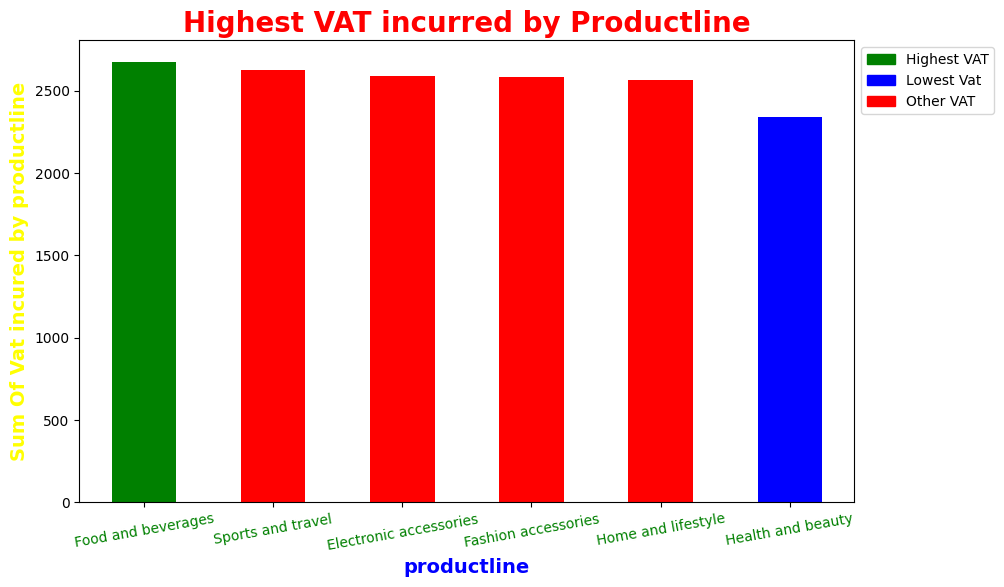

In [66]:
# Visualizing the question:8] Which product line incurred the highest VAT?

# Set the figure size for the bar chart
plt.figure(figsize=(10,6))

# Sort the product line incurred the highest VAT in descending order (ascending=False)
productline_highest_vat = productline_highest_vat.sort_values(ascending=False)

# Find the maximum and minimum product line highest vat
max_value = productline_highest_vat.max()
min_value = productline_highest_vat.min()

#  Define colors based on conditions: red for regular, green for highest, blue for lowest
colors = ['green'if x==max_value else 'blue'if x==min_value else'red' for x in productline_highest_vat]

# Plot the bar chart for the total VAT incurred by each product line
# Use 'hotpink' color  for the bars
productline_highest_vat.plot(kind='bar',color=colors,legend=True)

# Set the title of the bar chart with specified color and font properties
plt.title('Highest VAT incurred by Productline',color='red',fontdict={'fontsize':20,'fontweight':'bold'})

# Set the x-axis label with specified color and font properties
plt.xlabel('productline',color='blue',fontdict={'fontsize':14,'fontweight':'bold'})

# Set the y-axis label with specified color and font properties
plt.ylabel('Sum Of Vat incured by productline',color='yellow',fontdict={'fontsize':14,'fontweight':'bold'}) 

# Rotate the x-tick labels for better readability and set their color
plt.xticks(rotation=10,color='green')

# Create custom patches for the legend 
import matplotlib.patches as mpatches
highest_patch = mpatches.Patch(color='green', label='Highest VAT')
lowest_patch = mpatches.Patch(color='blue', label='Lowest Vat')
rest_patch = mpatches.Patch(color='red', label='Other VAT')

# Add the legend outside the bar graph to avoid overlap
plt.legend(handles=[highest_patch, lowest_patch, rest_patch], loc='upper left', bbox_to_anchor=(1, 1))

plt.show() # display the plot

In [67]:
# 9]Retrieve each product line and add a column product_category, indicating 'Good' or 'Bad,'
# based on whether its sales are above the average.

# Group the DataFrame by 'Product line' and calculate the total sales for each product line
# Reset the index to convert the Series back to  a DataFrame
product_sales = df.groupby('Product line')['Total'].sum().reset_index()

# Calculate the average sales across all product lines.
average_sales = product_sales['Total'].mean()

# Create a new column 'Product category' to classify each product line as "Good" or "Bad"
# "Good" if the total sales are greater than the average sales, otherwise "Bad"
product_sales['Product_category'] = np.where(product_sales['Total']>average_sales,'Good','Bad')

# Print the DataFrame showing total sales and product category for each product line
print(product_sales)

             Product line       Total Product_category
0  Electronic accessories  54337.5315             Good
1     Fashion accessories  54305.8950             Good
2      Food and beverages  56144.8440             Good
3       Health and beauty  49193.7390              Bad
4      Home and lifestyle  53861.9130             Good
5       Sports and travel  55122.8265             Good


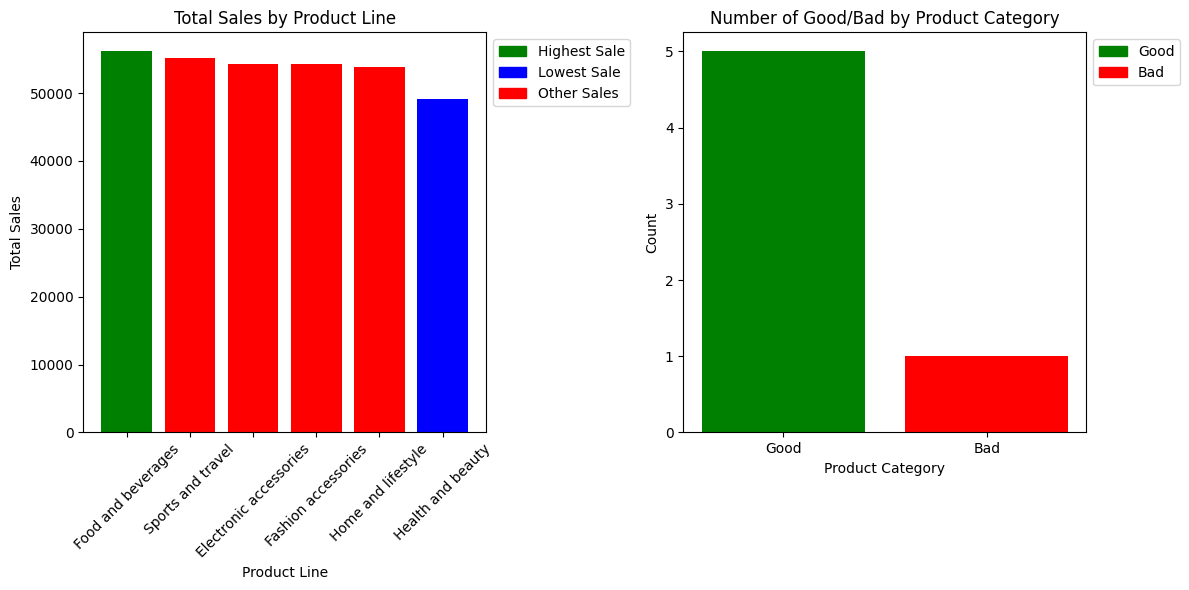

In [68]:
# Visualizing the question:9] Retrieve each product line and add a column product_category, indicating 'Good' or 'Bad,'
# based on whether its sales are above the average.

# Sort the product_sales in descending order by 'Total'
product_sales = product_sales.sort_values(by='Total', ascending=False)

# Create a figure and a set of subplots (1 row, 2 columns) with a specified figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Find the highest and lowest values in the 'Total' column
max_value = product_sales['Total'].max()
min_value = product_sales['Total'].min()

# Define colors based on conditions: green for the highest, blue for the lowest, and red for the rest
colors = ['green' if total == max_value else 'blue' if total == min_value else 'red' for total in product_sales['Total']]

# Plot the total sales by product line on the first subplot (ax[0])
ax[0].bar(product_sales['Product line'], product_sales['Total'], color=colors)

# Set the title for the first subplot
ax[0].set_title('Total Sales by Product Line')

# Set the x-axis label for the first subplot
ax[0].set_xlabel('Product Line')

# Set the y-axis label for the first subplot
ax[0].set_ylabel('Total Sales')

# Rotate the x-tick labels for better readability
ax[0].tick_params(axis='x', rotation=45)

# Create custom patches for the legend in the first subplot
import matplotlib.patches as mpatches
highest_patch = mpatches.Patch(color='green', label='Highest Sale')
lowest_patch = mpatches.Patch(color='blue', label='Lowest Sale')
rest_patch = mpatches.Patch(color='red', label='Other Sales')

# Add the legend outside the first subplot to avoid overlap
ax[0].legend(handles=[highest_patch, lowest_patch, rest_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Calculate the counts of 'Good' or 'Bad' product categories
categories = product_sales['Product_category'].value_counts()

# Plot the counts of Good and Bad product categories on the second subplot (ax[1])
ax[1].bar(categories.index, categories.values, color=['green', 'red'])

# Set the title for the second subplot
ax[1].set_title('Number of Good/Bad by Product Category')

# Set the x-axis label for the second subplot
ax[1].set_xlabel('Product Category')

# Set the y-axis label for the second subplot
ax[1].set_ylabel('Count')

# Create custom patches for the legend in the first subplot
import matplotlib.patches as mpatches
highest_patch = mpatches.Patch(color='green', label='Good')
lowest_patch = mpatches.Patch(color='red', label='Bad')

# Add a legend for the second subplot
ax[1].legend(handles=[highest_patch, lowest_patch], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to prevent overlap and ensure spacing is adequate
plt.tight_layout()

# Display the combined bar charts
plt.show()




In [69]:
# 10] Which branch sold more products than average product sold?

# Group the DataFrame by 'Branch' and sum the 'Quantity' to get the total products sold per branch
products_sold_branches = df.groupby('Branch')['Quantity'].sum()

# Calculate the average quantity of products sold across all branches
avg_product_sold =np.mean(products_sold_branches)

# Identify branches that sold more than the average quantity
# Filter the product_sold_branches  Series to include only those branches with sales above the average 
branches_above_average = products_sold_branches[products_sold_branches>avg_product_sold]

# Print the branches that have sold above-average quantities of products
print(branches_above_average)

Branch
A    1859
Name: Quantity, dtype: int64


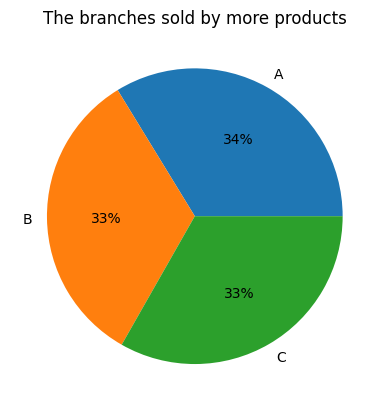

In [70]:
# Visualizing the question:10] Which branch sold more products than average product sold?

# Plot a pie chart to visualize the proportion of total products sold by each branch
# 'autopct='%1.0f%%'' displays the percentage of each slice with no decimal places
products_sold_branches.plot(kind='pie',autopct='%1.0f%%')

# Set the title of the pie chart to indicate what it represents
plt.title("The branches sold by more products")

# Hide the y-label since it is not needed for a pie chart
plt.ylabel('') # hide the label

# Display the pie chart
plt.show()




In [71]:
# 11]What is the most common product line by gender?

# Group by 'Product line' and 'Gender' and count occurrences
product_line_gender = df.groupby(['Product line', 'Gender']).size().reset_index(name='Count')

# Find the most common product line for each gender
most_common_product_line = product_line_gender.loc[product_line_gender.groupby('Gender')['Count'].idxmax()]

# Print the most common product line
print(most_common_product_line)

          Product line  Gender  Count
2  Fashion accessories  Female     96
7    Health and beauty    Male     88


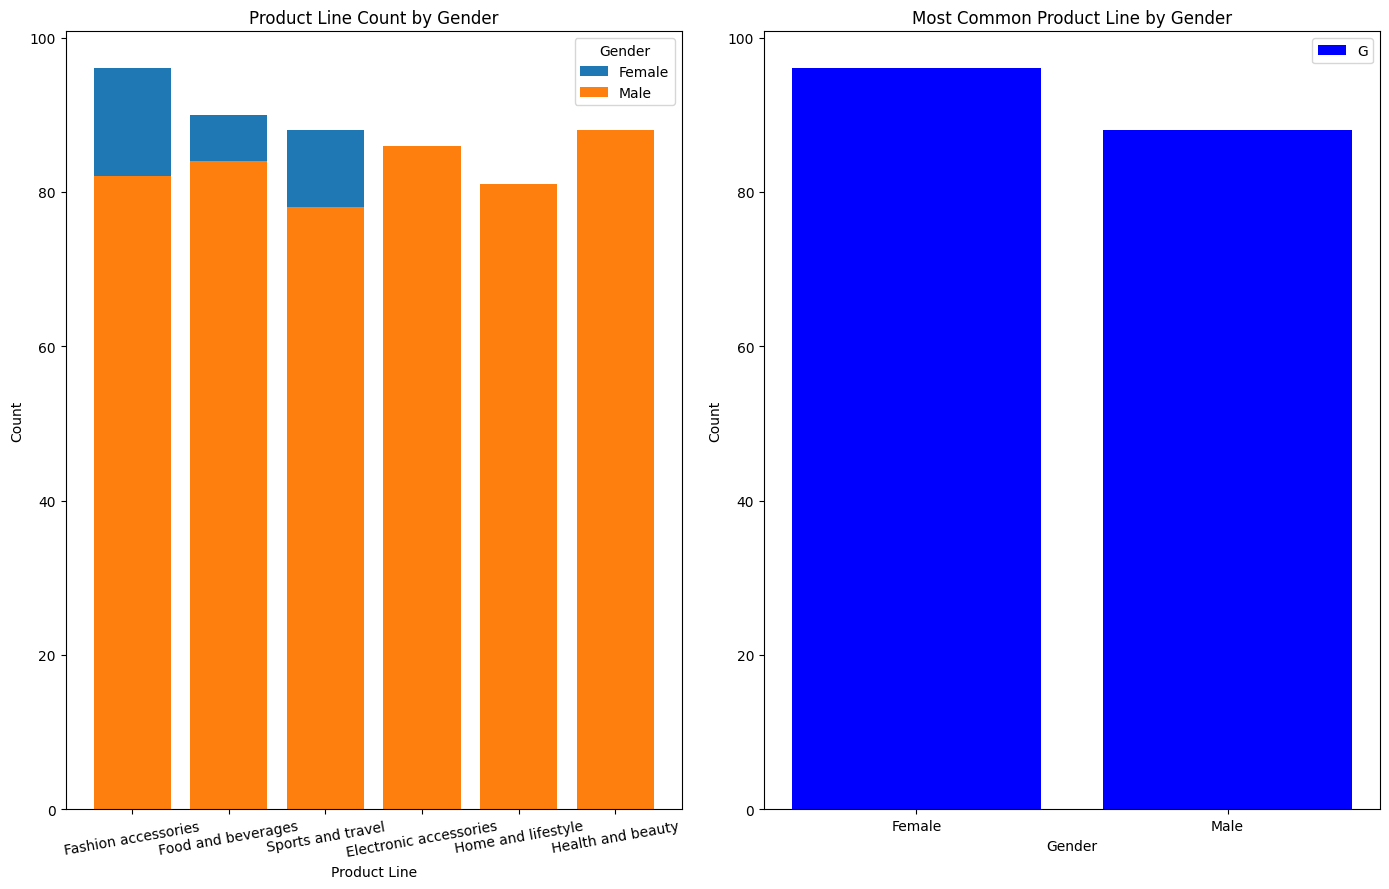

In [72]:
# Visualizing the question: 11]What is the most common product line by gender?

# Sort the product line in descending order (ascending=False)

# Sort the product line by gender in descending order (ascending=False)
product_line_gender = product_line_gender.sort_values(by='Count',ascending=False)

# Create subplots for visualizing the product line distribution by gender
fig, ax = plt.subplots(1,2 ,figsize=(14, 9))  # Create a 1-row, 2-column grid of subplots with a specified figure size

# First bar plot: Count of each product line by gender
# Loop through the unique values of 'Gender' in the dataset to plot product lines for each gender
for gender in product_line_gender['Gender'].unique():
    filtered_data = product_line_gender[product_line_gender['Gender'] == gender]  # Filter data for the current gender
    ax[0].bar(filtered_data['Product line'], filtered_data['Count'], label=gender)  # Create a bar chart for the current gender

# Set the title, labels, and adjust the appearance of the first subplot
ax[0].set_title('Product Line Count by Gender')  # Title of the first plot
ax[0].set_xlabel('Product Line')  # Label for the x-axis
ax[0].set_ylabel('Count')  # Label for the y-axis
ax[0].tick_params(axis='x', rotation=10)  # Rotate the x-axis labels slightly for better readability
ax[0].legend(title='Gender')  # Add a legend to indicate which bars correspond to which gender

# Second bar plot: Most common product line by gender
# Visualize the most common product line for each gender
ax[1].bar(most_common_product_line['Gender'], most_common_product_line['Count'], color='blue')  # Bar plot for the most common product line

# Set the title and labels for the second subplot
ax[1].set_title('Most Common Product Line by Gender')  # Title for the second plot
ax[1].set_xlabel('Gender')  # Label for the x-axis
ax[1].set_ylabel('Count')  # Label for the y-axis
ax[1].legend('Gender')


# Adjust layout to prevent overlap between subplots and improve spacing
plt.tight_layout()

# Display the visualizations
plt.show()


In [73]:
# 12] What is the average rating of each product line?

# Group the DataFrame by 'Product line' and calculate the average rating for each product line
# This step aggregates the 'Rating' column by taking the mean for each unique product line
product_line = df.groupby('Product line')['Rating'].mean()

# Print the result of the grouping operation, which displays each product line along with its average rating
print(product_line)


Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


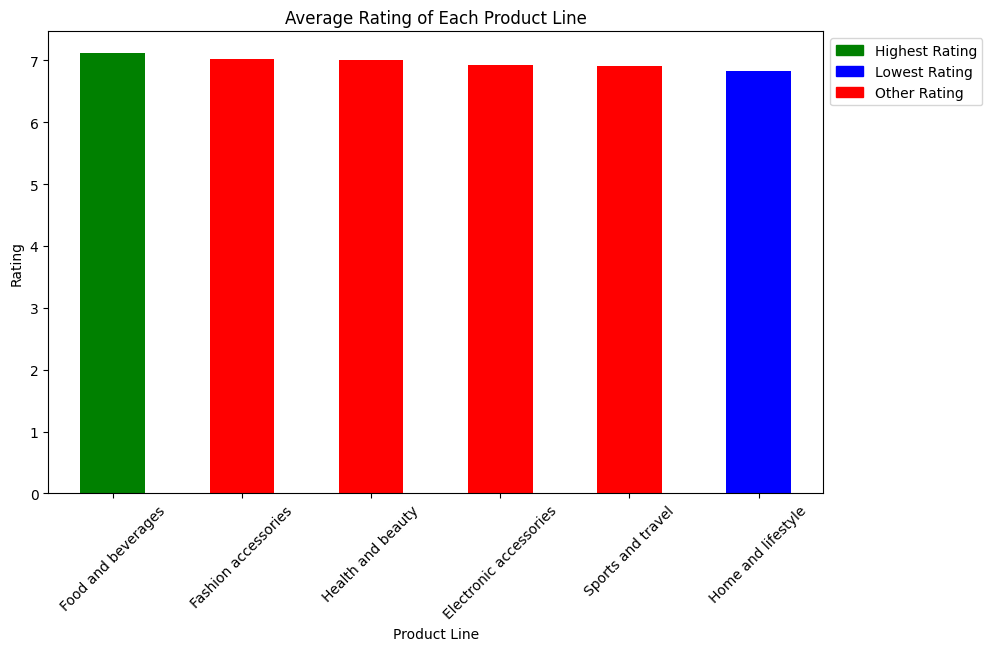

In [74]:
# Visualizing the question: 12] What is the average rating of each product line?

# Group the DataFrame by 'Product line' and calculate the average rating for each product line
# This step aggregates the 'Rating' column by taking the mean for each unique product line
product_line = df.groupby('Product line')['Rating'].mean()

# Sort the average rating of product line in descending order
product_line = product_line.sort_values(ascending=False)

# Set the figure size for the plot to ensure better readability and visualization
plt.figure(figsize=(10, 6))  # The figure will be 10 units wide and 6 units tall

# Find the maximum and minimum average rating of each product line
max_value = product_line.max()
min_value = product_line.min()

# Define colors based on conditions: green for the highest, blue for the lowest, and red for the rest
colors = ['green' if rating == max_value else 'blue' if rating == min_value else 'red' for rating in product_line]

# Create a bar plot of the average ratings for each product line
product_line.plot(kind='bar', color=colors)

# Set the title of the plot to describe the visualization's content
plt.title('Average Rating of Each Product Line')  # Title to summarize the plot

# Set the labels for the x-axis and y-axis to indicate what each axis represents
plt.xlabel('Product Line')  # Label for the x-axis
plt.ylabel('Rating')  # Label for the y-axis

# Rotate the x-axis labels slightly for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for improved readability

# Manually create a custom legend
import matplotlib.patches as mpatches

# Create patches for the legend
green_patch = mpatches.Patch(color='green',label='Highest Rating')
blue_patch = mpatches.Patch(color='blue',label='Lowest Rating')
red_patch = mpatches.Patch(color='red',label='Other Rating')

# Add the legend with the custom labels
plt.legend(handles=[green_patch,blue_patch,red_patch],loc='upper left',bbox_to_anchor=(1, 1))

# Display the plot
plt.show()  # Render the visualization




In [75]:
# Sales Analysis

# 1]Number of sales made in each time of the day per weekday.

# Convert the 'Date' column to datetime format to enable easier extraction of day information
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week as a string abbreviation (e.g., 'Mon', 'Tue', etc.)
df['Weekend'] = df['Date'].dt.strftime("%a")

# Convert the 'Time' column to datetime format to work with the hour component
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Extract the hour from the 'Time' column
df['hour'] = df['Time'].dt.hour

# Function to categorize hours into different parts of the day
def categorising_time_of_the_day(hour):
    if 0 <= hour < 12:
        return 'Morning'  # Time from 12 AM to 12 PM
    elif 12 <= hour < 17:
        return 'Afternoon'  # Time from 12 PM to 5 PM
    else:
        return 'Evening'  # Time from 5 PM onwards

# Apply the categorization function to the 'hour' column
df['time_of_day'] = df['hour'].apply(categorising_time_of_the_day)

# Group the data by time of day and day of the week, and count the number of sales for each combination
number_of_sales_per_day = df.groupby(['time_of_day', 'Weekend']).size().reset_index(name='Number of sales')

# Print the resulting DataFrame, which shows the number of sales made at each time of day for each weekday
print(number_of_sales_per_day)


   time_of_day Weekend  Number of sales
0    Afternoon     Fri               68
1    Afternoon     Mon               64
2    Afternoon     Sat               69
3    Afternoon     Sun               59
4    Afternoon     Thu               61
5    Afternoon     Tue               62
6    Afternoon     Wed               71
7      Evening     Fri               42
8      Evening     Mon               40
9      Evening     Sat               67
10     Evening     Sun               52
11     Evening     Thu               44
12     Evening     Tue               60
13     Evening     Wed               50
14     Morning     Fri               29
15     Morning     Mon               21
16     Morning     Sat               28
17     Morning     Sun               22
18     Morning     Thu               33
19     Morning     Tue               36
20     Morning     Wed               22


In [76]:
# 2]Identify the customer type that generates the highest revenue.

# Group the data by 'Customer type' and calculate the total revenue for each group
highest_revenue = df.groupby('Customer type')['Total'].sum()

# Find the customer type that generates the highest total revenue
customer_type_highest_revenue = highest_revenue.idxmax()

# Print the result, displaying the customer type and the amount of the highest revenue
print(f"{customer_type_highest_revenue} is the customer type which generates the highest revenue - {highest_revenue.max()}")



Member is the customer type which generates the highest revenue - 164223.444


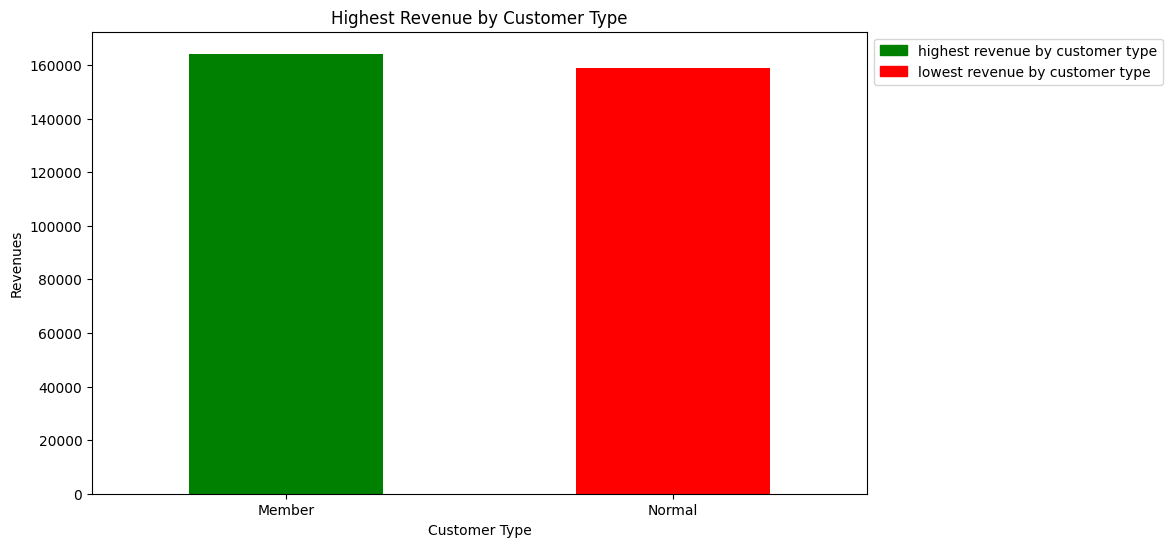

In [77]:
# Visualizing the question: 2] Identify the customer type that generates the highest revenue.

# Set the figure size to ensure the plot fits well on the screen
plt.figure(figsize=(10,6))  # Width = 10, Height = 6

# Create a bar plot for the total revenue generated by each customer type
# 'kind="bar"' specifies a bar chart, and 'color' assigns distinct colors to each bar
highest_revenue.plot(kind='bar', color=('green', 'red'),legend=True)

# Add a title to the plot describing its content
plt.title('Highest Revenue by Customer Type')

# Label the x-axis to show customer types and the y-axis for total revenue
plt.xlabel('Customer Type')  # X-axis represents different customer types
plt.ylabel('Revenues')  # Y-axis represents the total revenue for each customer type

# Keep the x-axis labels horizontal for better readability
plt.xticks(rotation=0)

# Manually create a custom legend
import matplotlib.patches as mpatches

# Create patches for the legend
green_patch = mpatches.Patch(color='green',label='highest revenue by customer type')
red_patch = mpatches.Patch(color='red',label='lowest revenue by customer type')

# Add the legend with the custom labels
plt.legend(handles=[green_patch,red_patch],loc='upper left',bbox_to_anchor=(1, 1))


# Display the plot
plt.show()


In [78]:
# 3] Which city has the largest tax percent/ VAT (Value Added Tax)?

# Group the data by 'City' and calculate the total 5% tax (VAT) for each city
tax_percent = df.groupby('City')['Tax 5%'].sum()

# Find the city with the largest total VAT (tax percent)
city_largest_VAT = tax_percent.idxmax()

# Print the city with the largest VAT and the corresponding VAT amount
print(f"{city_largest_VAT} has the largest tax percent/ VAT - {tax_percent.max()}")


Naypyitaw has the largest tax percent/ VAT - 5265.1765


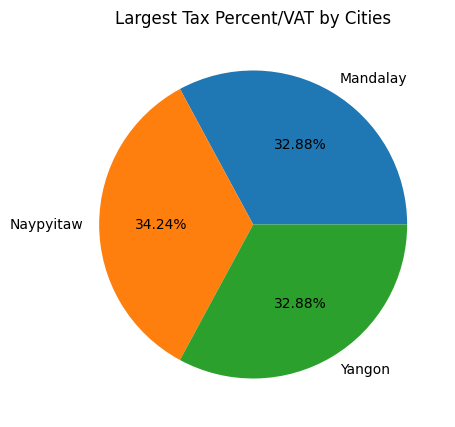

In [99]:
# Visualizing the question: 3] Which city has the largest tax percent/ VAT (Value Added Tax)?

# Set the figure size for the pie chart
plt.figure(figsize=(9, 5))  # Width = 9, Height = 5

# Create a pie chart to show the total tax (VAT) percentage by city
# 'autopct="%1.0f%%"' displays the percentage value on the pie slices
tax_percent.plot(kind='pie', autopct="%1.2f%%")

# Add a title to the pie chart
plt.title('Largest Tax Percent/VAT by Cities')

# Hide the y-axis label for a cleaner appearance
plt.ylabel('')

# Display the pie chart
plt.show()


In [80]:
# 4] Which customer type pays the most VAT?

# Group the data by 'Customer type' and calculate the total 5% tax (VAT) for each customer type
customer_type_VAT = df.groupby('Customer type')['Tax 5%'].sum()

# Find the customer type that pays the highest total VAT
customer_type_highet_VAT = customer_type_VAT.idxmax()

# Print the customer type that pays the most VAT and the corresponding VAT amount
print(f"{customer_type_highet_VAT} is the customer type that pays the most VAT - {customer_type_VAT.max()}")


Member is the customer type that pays the most VAT - 7820.164


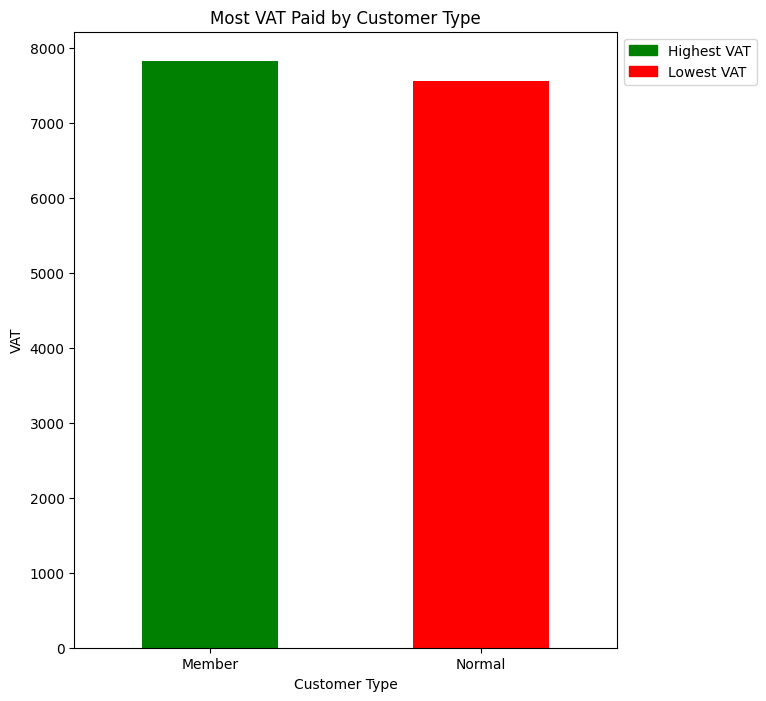

In [81]:
# Visualizing the question: 4] Which customer type pays the most VAT?

# Set the figure size for the bar chart
plt.figure(figsize=(7, 8))  # Width = 7, Height = 8

# Create a bar plot to show the total VAT paid by each customer type
# 'kind="bar"' specifies a bar chart, and 'color' assigns distinct colors to the bars
customer_type_VAT.plot(kind='bar', color=('green', 'red'))

# Add a title to the bar chart
plt.title('Most VAT Paid by Customer Type')

# Label the x-axis and y-axis to indicate what each axis represents
plt.xlabel('Customer Type')  # X-axis represents different customer types
plt.ylabel('VAT')  # Y-axis represents the total VAT paid by each customer type

# Keep the x-axis labels horizontal for better readability
plt.xticks(rotation=0)

# Manually create a custom legend
import matplotlib.patches as mpatches

# Create patches for the legend
green_patch = mpatches.Patch(color='green', label='Highest VAT')
red_patch = mpatches.Patch(color='red', label='Lowest VAT')

# Add the legend with the custom labels
plt.legend(handles=[green_patch, red_patch], loc='upper left',bbox_to_anchor=(1, 1))

# Display the bar chart
plt.show()


In [82]:
# Customer Analysis

# 1] How many unique customer types does the data have?

# Count the number of unique customer types in the 'Customer type' column
unique_customer_type = df['Customer type'].nunique()

# Print the total number of unique customer types
print(f'Number of Customer types: {unique_customer_type}')



Number of Customer types: 2


In [83]:
# 2] How many unique payment methods does the data have?

# Count the number of unique payment methods in the 'Payment' column
unique_payment_method = df['Payment'].nunique()

# Print the total number of unique payment methods
print(f"Number of unique payment methods: {unique_payment_method}")


Number of unique payment methods: 3


In [84]:
# 3] Which is the most common customer type?

# Count the occurrences of each customer type in the 'Customer type' column
customer_type = df['Customer type'].value_counts()

# Find the most common customer type using idxmax()
most_common_customer_type = customer_type.idxmax()

# Print the most common customer type
print(f"The most common customer type is {most_common_customer_type}")


The most common customer type is Member


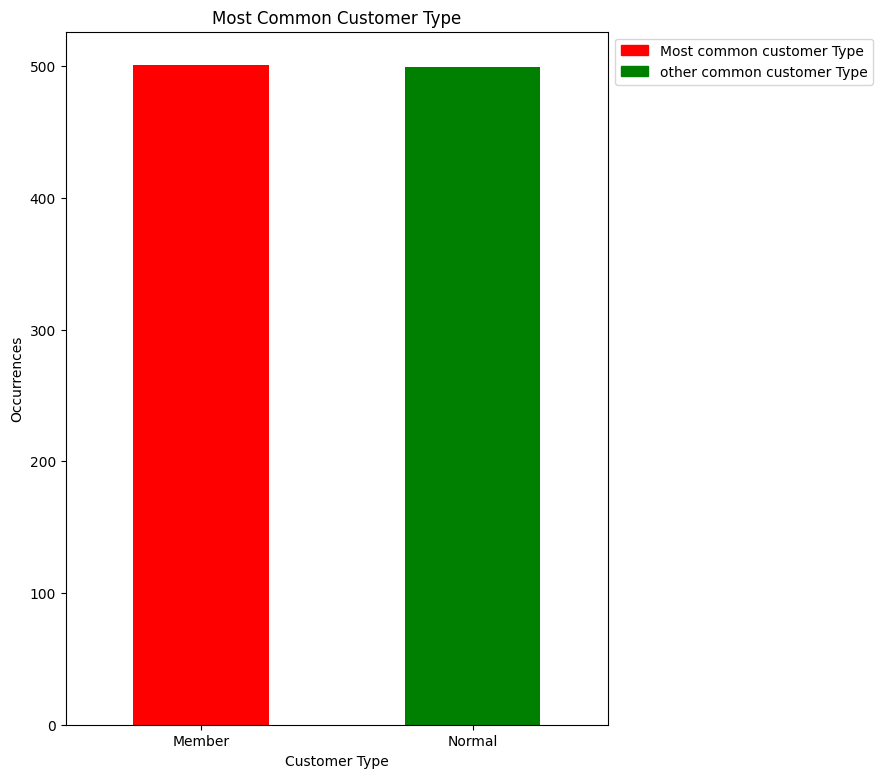

In [85]:
# Visualizing the question: 3] Which is the most common customer type?

# Set the figure size for the bar chart
plt.figure(figsize=(7, 9))  # Width = 7, Height = 9

# Create a bar plot to show the occurrences of each customer type
# 'kind="bar"' specifies a bar chart, and 'color' assigns distinct colors to the bars
customer_type.plot(kind='bar', color=('red', 'green'))

# Add a title to the bar chart
plt.title("Most Common Customer Type")

# Label the x-axis and y-axis to indicate what each axis represents
plt.xlabel("Customer Type")  # X-axis represents different customer types
plt.ylabel("Occurrences")     # Y-axis represents the number of occurrences for each customer type

# Keep the x-axis labels horizontal for better readability
plt.xticks(rotation=0)

# Manually create a custom legend
import matplotlib.patches as mpatches

# Create patches for the legend
red_patch = mpatches.Patch(color='red', label='Most common customer Type')
green_patch = mpatches.Patch(color='green', label='other common customer Type')

# Add the legend with the custom labels
plt.legend(handles=[red_patch,green_patch], loc='upper left',bbox_to_anchor=(1, 1))



# Display the bar chart
plt.show()



In [86]:
# 4] Which customer type buys the most?

# Group the data by 'Customer type' and calculate the total quantity purchased by each type
customer_type_quantity = df.groupby('Customer type')['Quantity'].sum().reset_index()

# Find the customer type with the highest total quantity purchased
most_buying_customer_type = customer_type_quantity.loc[customer_type_quantity['Quantity'].idxmax()]

# Print the most buying customer type and the corresponding total quantity
print(f'The most buying customer type: {most_buying_customer_type["Customer type"]} and total quantity is {most_buying_customer_type["Quantity"]}')


The most buying customer type: Member and total quantity is 2785


<Figure size 700x800 with 0 Axes>

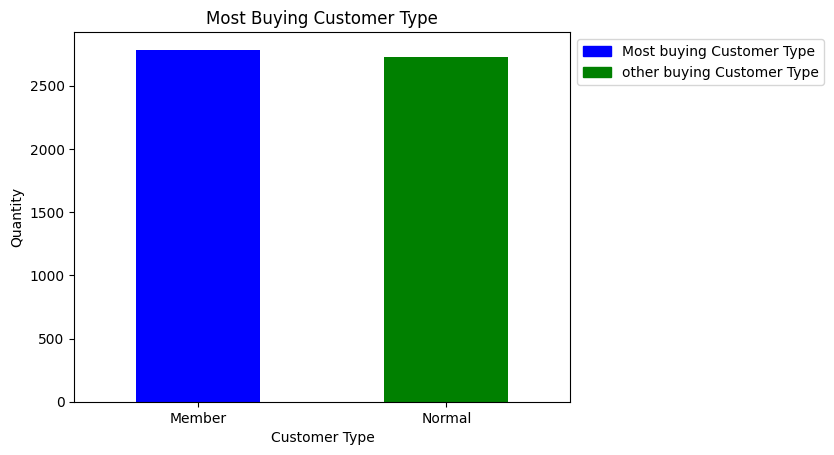

In [87]:
# Visualizing the question: 4]Which customer type buys the most?

# Set the figure size for the bar chart
plt.figure(figsize=(7, 8))  # Width = 7, Height = 8

# Create a bar plot to show the total quantity purchased by each customer type
# 'kind="bar"' specifies a bar chart, 'x' sets the customer types, 'y' sets the quantities,
# and 'color' assigns distinct colors to the bars
customer_type_quantity.plot(kind='bar', x='Customer type', y='Quantity', color=('blue', 'green'))

# Add a title to the bar chart
plt.title("Most Buying Customer Type")

# Label the x-axis and y-axis to indicate what each axis represents
plt.xlabel("Customer Type")  # X-axis represents different customer types
plt.ylabel("Quantity")        # Y-axis represents the total quantity purchased by each customer type

# Keep the x-axis labels horizontal for better readability
plt.xticks(rotation=0)
# Manually create a custom legend
import matplotlib.patches as mpatches

# Create patches for the legend
blue_patch = mpatches.Patch(color='blue', label='Most buying Customer Type')
green_patch = mpatches.Patch(color='green', label='other buying Customer Type')


# Add the legend with the custom labels
plt.legend(handles=[blue_patch, green_patch, ], loc='upper left',bbox_to_anchor=(1, 1))


# Display the bar chart
plt.show()


In [88]:
# 5]What is the gender of most of the customers?

# Count the occurrences of each gender in the 'Gender' column and reset the index
customers_gender = df['Gender'].value_counts().reset_index()

# Find the gender with the highest occurrences
most_customers_gender = customers_gender.loc[customers_gender['count'].idxmax()]

# Print the most common gender and the corresponding count of occurrences
print(f"The most common gender of the customers is {most_customers_gender['Gender']} and the number of occurrences is {most_customers_gender['count']}")


The most common gender of the customers is Female and the number of occurrences is 501


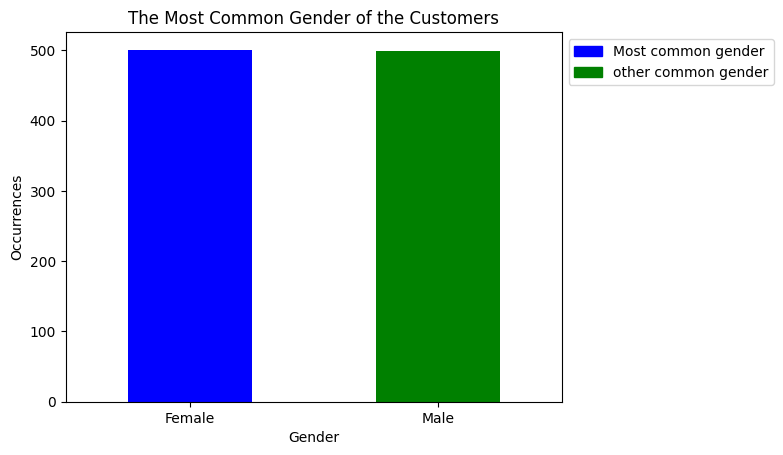

In [89]:
# Visualizing the question: 5]What is the gender of most of the customers?

# Create a bar plot to show the occurrences of each gender
# 'kind="bar"' specifies a bar chart, 'x' sets the gender categories, 
# 'y' sets the counts, and 'color' assigns colors to the bars
customers_gender.plot(kind='bar', x='Gender', y='count', color=('blue', 'green'))

# Add a title to the bar chart
plt.title("The Most Common Gender of the Customers")

# Label the x-axis and y-axis to indicate what each axis represents
plt.xlabel("Gender")       # X-axis represents the gender categories
plt.ylabel("Occurrences")  # Y-axis represents the number of occurrences for each gender

# Keep the x-axis labels horizontal for better readability
plt.xticks(rotation=0)

# Manually create a custom legend
import matplotlib.patches as mpatches

# Create patches for the legend
blue_patch = mpatches.Patch(color='blue', label='Most common gender')
green_patch = mpatches.Patch(color='green', label='other common gender')

# Add the legend with the custom labels
plt.legend(handles=[ blue_patch,green_patch], loc='upper left',bbox_to_anchor=(1, 1))


# Display the bar chart
plt.show()


In [90]:
# 6]What is the gender distribution per branch? 

# Group the DataFrame by 'Gender' and 'Branch', and count the occurrences in each group
gender_distribution = df.groupby(['Gender', 'Branch']).size().reset_index(name='count')

# Print the resulting DataFrame showing the distribution of genders across different branches
print(gender_distribution)


   Gender Branch  count
0  Female      A    161
1  Female      B    162
2  Female      C    178
3    Male      A    179
4    Male      B    170
5    Male      C    150


In [91]:
# 7]Which time of the day do customers give most ratings?

# Convert the 'Time' column to datetime format, coercing errors to handle invalid times
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Extract the hour from the 'Time' column
df['hour'] = df['Time'].dt.hour

# Function to categorize the hour into 'Morning', 'Afternoon', or 'Evening'
def categorising_time_of_the_day(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the categorization function to create a new column 'Time_of_day'
df['Time_of_day'] = df['hour'].apply(categorising_time_of_the_day)

# Group the data by 'Time_of_day' and count the number of ratings given
most_ratings = df.groupby('Time_of_day')['Rating'].count().reset_index()

# Find the time of day with the highest number of ratings
time_of_the_day_customer_ratings = most_ratings.loc[most_ratings['Rating'].idxmax()]

# Print the time of day when customers give the most ratings along with the count
print(f"{time_of_the_day_customer_ratings['Time_of_day']} is the time when customers give the most ratings: {time_of_the_day_customer_ratings['Rating']}")


Afternoon is the time when customers give the most ratings: 454


<Figure size 1000x600 with 0 Axes>

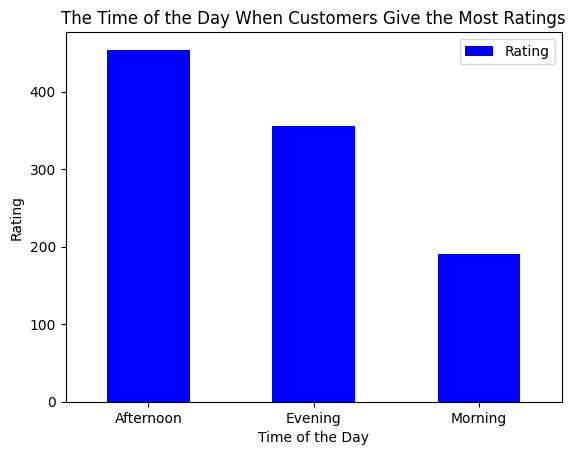

In [92]:
# Visualizing the question: 7]Which time of the day do customers give most ratings?

# Set the figure size for the bar chart
plt.figure(figsize=(10, 6))  # Width = 10, Height = 6

# Create a bar plot to show the number of ratings given during different times of the day
# 'kind="bar"' specifies a bar chart, 'x' sets the time categories, and 'y' sets the rating counts
most_ratings.plot(kind='bar', x='Time_of_day', y='Rating', color='blue')

# Add a title to the bar chart
plt.title("The Time of the Day When Customers Give the Most Ratings")

# Label the x-axis and y-axis to indicate what each axis represents
plt.xlabel("Time of the Day")  # X-axis represents different times of the day
plt.ylabel("Rating")            # Y-axis represents the number of ratings

# Keep the x-axis labels horizontal for better readability
plt.xticks(rotation=0)

# Display the bar chart
plt.show()



In [93]:
# 8] Which time of the day do customers give most ratings per branch?

# Convert the 'Time' column to datetime format, coercing errors to handle invalid times
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Extract the hour from the 'Time' column
df['hour'] = df['Time'].dt.hour

# Function to categorize the hour into 'Morning', 'Afternoon', or 'Evening'
def categorising_time_of_the_day(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the categorization function to create a new column 'Time_of_day'
df['Time_of_day'] = df['hour'].apply(categorising_time_of_the_day)

# Group the data by 'Time_of_day' and 'Branch', and count the number of ratings given
most_ratings = df.groupby(['Time_of_day', 'Branch'])['Rating'].count().reset_index()

# Print the resulting DataFrame showing the count of ratings per time of day for each branch
print(most_ratings)


  Time_of_day Branch  Rating
0   Afternoon      A     158
1   Afternoon      B     142
2   Afternoon      C     154
3     Evening      A     109
4     Evening      B     131
5     Evening      C     115
6     Morning      A      73
7     Morning      B      59
8     Morning      C      59


In [94]:
# 9]Which day of the week has the best avg ratings?

# Convert the 'Date' column to datetime format for easier manipulation
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week from the 'Date' column (abbreviated format)
df['day_of_week'] = df['Date'].dt.strftime("%a")

# Group the data by 'day_of_week' and calculate the average rating for each day
day_of_week = df.groupby('day_of_week')['Rating'].mean().reset_index()

# Find the day of the week with the highest average rating
best_day_of_week_best_avg_rating = day_of_week.loc[day_of_week['Rating'].idxmax()]

# Print the day of the week with the best average rating and the corresponding average rating
print(best_day_of_week_best_avg_rating)


day_of_week       Mon
Rating         7.1536
Name: 1, dtype: object


<Figure size 700x1000 with 0 Axes>

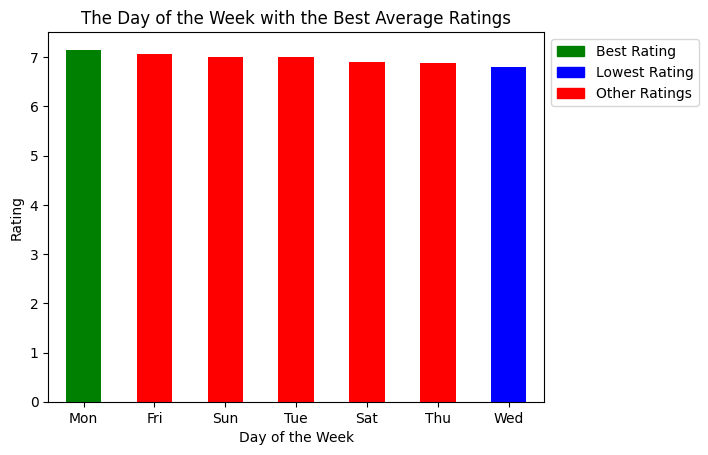

In [95]:
# Visualizing the question: 9] Which day of the week has the best avg ratings?
# Sort the best average rating - day of the week in descending order.
day_of_week = day_of_week.sort_values(by='Rating', ascending=False)

# Set the figure size for the bar chart to enhance visualization
plt.figure(figsize=(7, 10))  # Width = 7, Height = 10

# Find maximum and minimum best average rating
max_value = day_of_week['Rating'].max()
min_value = day_of_week['Rating'].min()

# Define colors based on conditions: green for the highest, blue for the lowest, and red for the rest
colors = ['green' if rating == max_value else 'blue' if rating == min_value else 'red' for rating in day_of_week['Rating']]

# Create a bar plot to visualize the average ratings for each day of the week
day_of_week.plot(kind='bar', x='day_of_week', y='Rating', color=colors)

# Add a title to the bar chart
plt.title("The Day of the Week with the Best Average Ratings")

# Label the x-axis and y-axis to indicate what each axis represents
plt.xlabel("Day of the Week")  # X-axis represents different days of the week
plt.ylabel("Rating")           # Y-axis represents the average rating

# Keep the x-axis labels horizontal for better readability
plt.xticks(rotation=0)

# Manually create a custom legend
import matplotlib.patches as mpatches

# Create patches for the legend
green_patch = mpatches.Patch(color='green', label='Best Rating')
blue_patch = mpatches.Patch(color='blue', label='Lowest Rating')
red_patch = mpatches.Patch(color='red', label='Other Ratings')

# Add the legend with the custom labels
plt.legend(handles=[green_patch, blue_patch, red_patch], loc='upper left',bbox_to_anchor=(1, 1))

# Display the bar chart
plt.show()



In [96]:
# 10]Which day of the week has the best average ratings per branch?

# Convert the 'Date' column to datetime format for easier manipulation
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week from the 'Date' column (abbreviated format)
df['day_of_week'] = df['Date'].dt.strftime("%a")

# Group the data by 'day_of_week' and 'Branch', calculating the average rating for each combination
day_of_week_best_avg_per_branch = df.groupby(['day_of_week', 'Branch'])['Rating'].mean().reset_index()

# Print the resulting DataFrame showing the average rating for each day of the week by branch
print(day_of_week_best_avg_per_branch)


   day_of_week Branch    Rating
0          Fri      A  7.312000
1          Fri      B  6.694118
2          Fri      C  7.278947
3          Mon      A  7.097917
4          Mon      B  7.335897
5          Mon      C  7.036842
6          Sat      A  6.746000
7          Sat      B  6.736667
8          Sat      C  7.229630
9          Sun      A  7.078846
10         Sun      B  6.888571
11         Sun      C  7.028261
12         Thu      A  6.958696
13         Thu      B  6.752273
14         Thu      C  6.950000
15         Tue      A  7.058824
16         Tue      B  7.001887
17         Tue      C  6.951852
18         Wed      A  6.916279
19         Wed      B  6.452000
20         Wed      C  7.064000
